In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Fantasy-Hockey\2018 Player Rankings.csv", encoding='latin1')
df.set_index('Ranking', drop=True, inplace=True)
df.loc[:, 'Position'] = [x.split()[-1].split(',') for x in df.loc[:, 'Player Name']]
df.loc[:, 'Team'] = [x.split()[2] for x in df.loc[:, 'Player Name']]
df.loc[:, 'Player Name'] = [" ".join(x.split()[:2]) for x in df.loc[:, 'Player Name']]

In [3]:
requirements = {'C':2,
               'LW':2,
               'RW':2,
               'D':4,
               'G':2}

In [4]:
NUM_TEAMS = 14

In [5]:
counter = 0
current_round = 1
for index,row in df.iterrows():
    counter += 1
    df.loc[index, 'Round'] = int(current_round)
    if counter%NUM_TEAMS==0:
        current_round += 1

In [6]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [7]:
def custom_count(l, entry):
    counter = 0
    for i in l:
        if entry in i:
            counter+=1
    return counter

In [8]:
data = []
for i in np.unique(np.array(df.loc[:, 'Round'])):
    position_count = dict()
    this_round = i
    positions = df.loc[df['Round']==i, 'Position'].tolist()
    for j in requirements.keys():
        position_count[j] = custom_count(positions, j)
    data.append({
        'Round':int(i),
        **position_count
    })
rounds = pd.DataFrame(data)
rounds.set_index('Round', drop=True, inplace=True)

C [7, 4, 5, 5, 3, 5, 2, 0, 2, 4, 5, 5, 6, 2, 0]
D [0, 2, 2, 2, 4, 3, 5, 10, 4, 6, 4, 4, 3, 3, 2]
G [1, 4, 4, 4, 2, 2, 0, 2, 3, 2, 1, 1, 0, 2, 0]
LW [2, 5, 1, 2, 4, 5, 6, 1, 3, 2, 4, 1, 2, 2, 1]
RW [4, 2, 2, 4, 5, 4, 2, 1, 6, 2, 3, 5, 7, 6, 2]


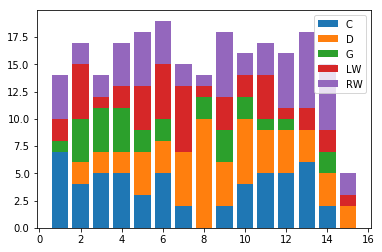

In [10]:
N = len(rounds)
sum_bottom = np.zeros(N)

for i in rounds.columns:
    pos = []
    for index,row in rounds.iterrows():
        pos.append(row[i])
    print(i, pos)
    ind = np.arange(1,N+1)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    plt.bar(ind, pos, bottom=sum_bottom)
    
    for index,row in rounds.iterrows():
        sum_bottom[index-1]=sum_bottom[index-1]+row[i]
        
plt.legend(rounds.columns)